# Problem Statement

The delhivery company wants to understand and process the data coming out of data engineering pipelines:

1• Clean, sanitize and manipulate data to get useful features out of raw fields

2• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import datetime as dt

In [2]:
delhi= pd.read_csv('delhivery_data.txt')

In [3]:
delhi.shape

(144867, 24)

In [4]:
delhi.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
delhi.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis =1, inplace=True)

The above columns are not needed in the analysis as they dont add any value for now.

In [7]:
delhi.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [8]:
delhi['trip_creation_time'] = delhi['trip_creation_time'].astype('datetime64[ns]')
delhi['od_start_time'] = delhi['od_start_time'].astype('datetime64[ns]')
delhi['od_end_time'] = delhi['od_end_time'].astype('datetime64[ns]')


In [9]:
# As route type is a categorical column we can perform one hot encoding to the column
delhi['route_type']=pd.get_dummies(delhi['route_type'],drop_first=True)

In [10]:
delhi['route_type'].unique()

array([0, 1], dtype=uint8)

In [11]:
delhi.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [12]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  uint8         
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [13]:
delhi.isnull().sum()/delhi.shape[0]

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.002023
destination_center                0.000000
destination_name                  0.001802
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

In [14]:
delhi[delhi.isna().any(axis=1)]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,1,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,24.538214,58.0,33.0,30.8845,58.0,33.0,30.8845
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,1,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,34.657709,110.0,43.0,41.5361,52.0,10.0,10.6517
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,1,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,1,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,1,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,1,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,45.134384,62.0,45.0,47.7734,34.0,23.0,23.6601
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,1,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,66.542266,86.0,71.0,71.9549,23.0,25.0,24.1815
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,1,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,88.143957,116.0,114.0,112.6943,30.0,43.0,40.7394
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,1,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,111.084417,173.0,123.0,134.1940,57.0,45.0,46.9217


In [15]:
delhi.loc[(delhi['source_center']=='IND342902A1B')]['source_name'].nunique()

0

we see there is no values for source centers we can remove the null values as the missing value count is very low compared to data.

In [16]:
delhi.dropna(inplace = True)

In [17]:
delhi.shape

(144316, 19)

In [18]:
delhi['data'].unique()

array(['training', 'test'], dtype=object)

In [19]:
delhi['data'].value_counts()

training    104632
test         39684
Name: data, dtype: int64

In [20]:
delhi_train =delhi.loc[delhi['data'] == 'training']

In [21]:
delhi_test =delhi.loc[delhi['data'] == 'test']

In [22]:
delhi_train.drop(['data'],axis=1,inplace=True)

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3940269317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_train.drop(['data'],axis=1,inplace=True)


In [23]:
delhi_test.drop(['data'],axis=1,inplace=True)

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3383071460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_test.drop(['data'],axis=1,inplace=True)


As there is both testing and training data in the sample data we have seperated them as df_test and df_train and dropped the data column from them as it represents the type of data for test or train

In [24]:
delhi_train.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [25]:
delhi_grouped =delhi_train.groupby(['trip_uuid','source_center','source_name','destination_center','destination_name']).agg(trip_creation_time = ('trip_creation_time','first'),route_schedule_uuid = ('route_schedule_uuid','first'), route_type = ('route_type','first'),od_start_time = ('od_start_time','first'),od_end_time = ('od_end_time','last'), start_scan_to_end_scan = ('start_scan_to_end_scan','first'), actual_distance_to_destination = ('actual_distance_to_destination','max'), actual_time =('actual_time','max'),osrm_time = ('osrm_time','max'),osrm_distance = ('osrm_distance','max'),tot_segment_actual_time =('segment_actual_time','sum'),
                       tot_segment_osrm_time = ('segment_osrm_time','sum'),
                       tot_segment_osrm_distance = ('segment_osrm_distance','sum')
                       ).reset_index()                                                                                                   

In [26]:
delhi_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18893 entries, 0 to 18892
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       18893 non-null  object        
 1   source_center                   18893 non-null  object        
 2   source_name                     18893 non-null  object        
 3   destination_center              18893 non-null  object        
 4   destination_name                18893 non-null  object        
 5   trip_creation_time              18893 non-null  datetime64[ns]
 6   route_schedule_uuid             18893 non-null  object        
 7   route_type                      18893 non-null  uint8         
 8   od_start_time                   18893 non-null  datetime64[ns]
 9   od_end_time                     18893 non-null  datetime64[ns]
 10  start_scan_to_end_scan          18893 non-null  float64       
 11  ac

In [27]:
delhi_grouped.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408


In [28]:
delhi_grouped = delhi_grouped.sort_values(by = ['trip_uuid','od_start_time'])

As the trips might be shuffled we are ordering them by trip_uuid and od_start_time so that we can maintain the source an destination of an order in further process

In [29]:
delhi_grouped.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
3,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
2,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
5,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270


In [30]:
delhi_grouped = delhi_grouped.sort_values(by=['trip_uuid','od_start_time'])

As the trips might be shuffled we are ordering them by trip_uuid and od_start_time so that we can maintain the source an destination of an order in further process

In [31]:
delhi_grouped.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
3,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
2,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
5,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270


In [32]:
delhi_grouped.shape

(18893, 18)

In [33]:
delhi_final=delhi_grouped.groupby(['trip_uuid']).agg(source_center = ('source_center','first'),
                                      source_name = ('source_name','first'),
                                      destination_center = ('destination_center','last'),
                                      destination_name = ('destination_name','last'),
                                      trip_creation_time = ('trip_creation_time','first'),
                                      route_schedule_uuid = ('route_schedule_uuid','first'), 
                                      route_type = ('route_type','first'),
                                      od_start_time = ('od_start_time','first'),
                                      od_end_time = ('od_end_time','last'), 
                                      start_scan_to_end_scan = ('start_scan_to_end_scan','sum'), 
                                      actual_distance_to_destination = ('actual_distance_to_destination','sum'), 
                                      actual_time =('actual_time','sum'),
                                      osrm_time = ('osrm_time','sum'),
                                      osrm_distance = ('osrm_distance','sum'),
                                      tot_segment_actual_time =('tot_segment_actual_time','sum'),
                                      tot_segment_osrm_time = ('tot_segment_osrm_time','sum'),
                                      tot_segment_osrm_distance = ('tot_segment_osrm_distance','sum'))

In [34]:
delhi_final= delhi_final.reset_index()

In [35]:
delhi_final.columns

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'tot_segment_actual_time', 'tot_segment_osrm_time',
       'tot_segment_osrm_distance'],
      dtype='object')

In [36]:
delhi_final.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


Now we have data for each order and their trip timings along with the source and destination and the type of trip

Lets start our analysis on this final dataset

In [37]:
delhi_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10645 entries, 0 to 10644
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       10645 non-null  object        
 1   source_center                   10645 non-null  object        
 2   source_name                     10645 non-null  object        
 3   destination_center              10645 non-null  object        
 4   destination_name                10645 non-null  object        
 5   trip_creation_time              10645 non-null  datetime64[ns]
 6   route_schedule_uuid             10645 non-null  object        
 7   route_type                      10645 non-null  uint8         
 8   od_start_time                   10645 non-null  datetime64[ns]
 9   od_end_time                     10645 non-null  datetime64[ns]
 10  start_scan_to_end_scan          10645 non-null  float64       
 11  ac

### Feature Extraction

In [38]:
delhi_final['od_year']= delhi_final['trip_creation_time'].dt.year
delhi_final['od_month']= delhi_final['trip_creation_time'].dt.month
delhi_final['od_date']= delhi_final['trip_creation_time'].dt.date
delhi_final['od_hour']= delhi_final['trip_creation_time'].dt.hour

In [39]:
delhi_final['source_city'] = delhi_final['source_name'].apply(lambda s:s.split('_')[0])
delhi_final['source_state']= delhi_final['source_name'].apply(lambda s:s.split('(')[1].replace(')',''))

In [40]:
delhi_final['destination_city'] = delhi_final['destination_name'].apply(lambda s:s.split('_')[0])
delhi_final['destination_state']= delhi_final['destination_name'].apply(lambda s:s.split('(')[1].replace(')',''))

In [41]:
delhi_final['od_duration']=(delhi_final['od_end_time']-delhi_final['od_start_time']).dt.total_seconds()/60

In [42]:
delhi_final.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,...,tot_segment_osrm_distance,od_year,od_month,od_date,od_hour,source_city,source_state,destination_city,destination_state,od_duration
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,...,1320.4733,2018,9,2018-09-12,0,Bhopal,Madhya Pradesh,Gurgaon,Haryana,2260.109800
1,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,...,84.1894,2018,9,2018-09-12,0,Tumkur,Karnataka,Chikblapur,Karnataka,181.611874
2,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,...,2545.2678,2018,9,2018-09-12,0,Bangalore,Karnataka,Chandigarh,Punjab,3934.362520
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,19.8766,2018,9,2018-09-12,0,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Maharashtra,100.494935
4,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,...,146.7919,2018,9,2018-09-12,0,Bellary,Karnataka,Bellary,Karnataka,718.349042


### EDA 

In [43]:
delhi_final.shape

(10645, 27)

In [44]:
delhi.info

<bound method DataFrame.info of             data         trip_creation_time  \
0       training 2018-09-20 02:35:36.476840   
1       training 2018-09-20 02:35:36.476840   
2       training 2018-09-20 02:35:36.476840   
3       training 2018-09-20 02:35:36.476840   
4       training 2018-09-20 02:35:36.476840   
...          ...                        ...   
144862  training 2018-09-20 16:24:28.436231   
144863  training 2018-09-20 16:24:28.436231   
144864  training 2018-09-20 16:24:28.436231   
144865  training 2018-09-20 16:24:28.436231   
144866  training 2018-09-20 16:24:28.436231   

                                      route_schedule_uuid  route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...           0   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...           0   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...           0   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...           0   
4       thanos::sroute:eb7bfc78-b351-4

In [45]:
for i in delhi.columns:
    print(i + ':' + str(delhi[i].nunique()))

data:2
trip_creation_time:14787
route_schedule_uuid:1497
route_type:2
trip_uuid:14787
source_center:1496
source_name:1496
destination_center:1466
destination_name:1466
od_start_time:26223
od_end_time:26223
start_scan_to_end_scan:1914
actual_distance_to_destination:143965
actual_time:3182
osrm_time:1531
osrm_distance:137544
segment_actual_time:746
segment_osrm_time:214
segment_osrm_distance:113497


we can make data and route_type as category data types

In [46]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  uint8         
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [47]:
delhi['route_type'].value_counts()

1    99132
0    45184
Name: route_type, dtype: int64

<Axes: xlabel='route_type', ylabel='count'>

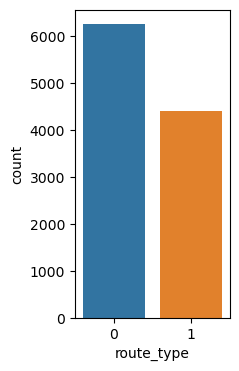

In [48]:
plt.figure(figsize=(2,4))
sns.countplot(x=delhi_final['route_type'])

<Axes: xlabel='route_type', ylabel='od_duration'>

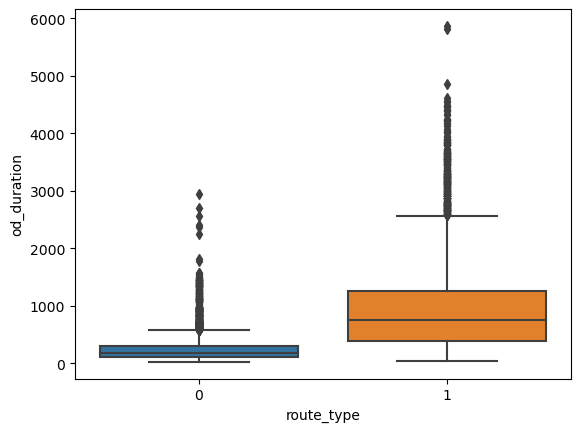

In [49]:
sns.boxplot(y=delhi_final['od_duration'],x=delhi_final['route_type'])

we can see that most of the orders use FTL route type and we can infer that the distance between the source and destinations are large

In [50]:
delhi_final['source_city'].value_counts().sort_values(ascending=False).reset_index().head(5)

,index,source_city
0,Gurgaon,749
1,Bengaluru,719
2,Bangalore,563
3,Bhiwandi,547
4,Delhi,467


We see that Bangalore and Bengaluru are same places but with different names we can replace one name with the other.

In [51]:
delhi_final['source_city'].replace('Bengaluru','Bangalore',inplace=True)

<Axes: xlabel='source_city', ylabel='index'>

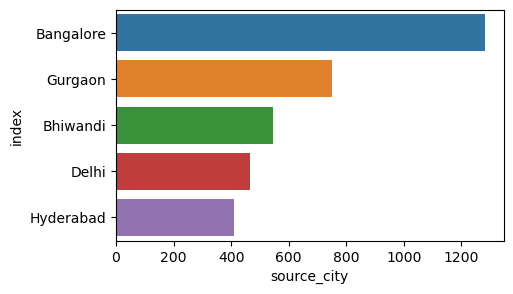

In [52]:
plt.figure(figsize=(5,3))
x=delhi_final['source_city'].value_counts().sort_values(ascending=False).reset_index().head()
sns.barplot(y=x['index'],x=x['source_city'])

Bangalore , Gurgaon and Bhiwandi are the top three places from where most of the trips start from.

We cant replace it in source name and centre , destination name and centre as they are different centers

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\383236152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=delhi_final['start_scan_to_end_scan']/60)


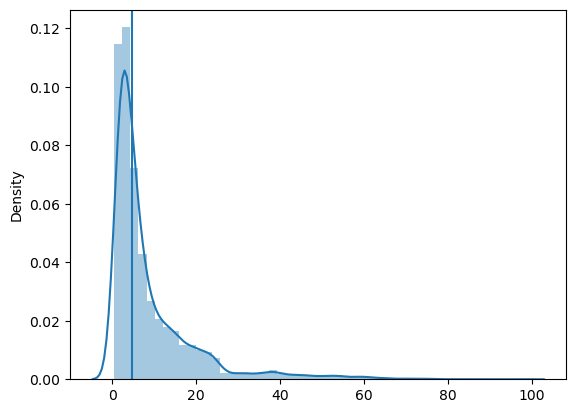

In [53]:
sns.distplot(x=delhi_final['start_scan_to_end_scan']/60)
plt.axvline(delhi_final['start_scan_to_end_scan'].median()/60)

Most of the orders are delivered in 8 hours to the destination

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1877187268.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=delhi_final['actual_time']/60)


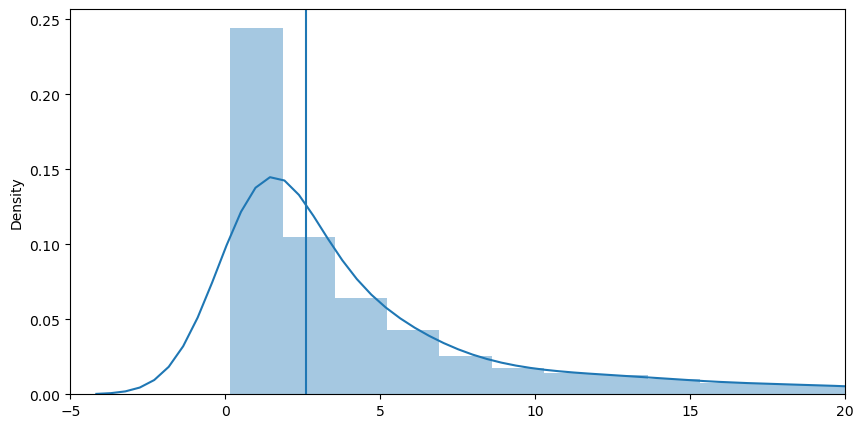

In [54]:
plt.figure(figsize=[10,5])
sns.distplot(x=delhi_final['actual_time']/60)
plt.axvline(delhi_final['actual_time'].median()/60)
plt.xlim([-5,20])
plt.show()

From above we can see that most of the orders are delivered by 2-3 hours to the destination

In [55]:
delhi_final['od_month'].value_counts()

9    10645
Name: od_month, dtype: int64

In [56]:
delhi_final['od_year'].value_counts()

2018    10645
Name: od_year, dtype: int64

In [57]:
delhi_final['od_date'].value_counts().sort_values(ascending=False).head(10)

2018-09-18    791
2018-09-15    783
2018-09-13    750
2018-09-12    747
2018-09-21    740
2018-09-22    740
2018-09-17    722
2018-09-14    712
2018-09-20    703
2018-09-25    695
Name: od_date, dtype: int64

These are the dates on which there are most number of orders took place, we can expect that there might be some offers occuring on the e-commerce platforms

In [58]:
delhi_final['od_hour'].value_counts().sort_values(ascending=False).head(3)

22    826
20    784
23    731
Name: od_hour, dtype: int64

Most number of orders happens on 22,20 and 23rd hours of the day

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1926026461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['osrm_distance'])


<Axes: xlabel='osrm_distance', ylabel='Density'>

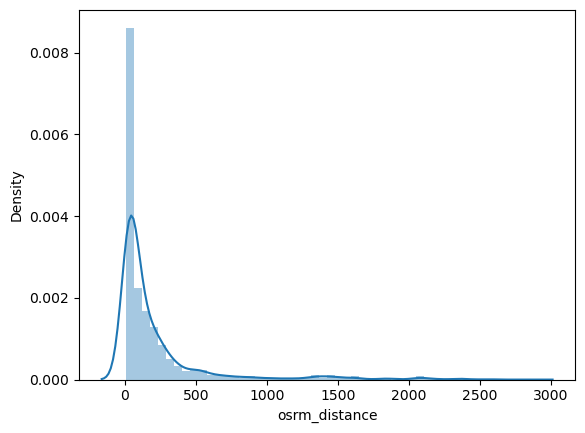

In [59]:
sns.distplot(delhi_final['osrm_distance'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3701556252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['tot_segment_actual_time'])


<Axes: xlabel='tot_segment_actual_time', ylabel='Density'>

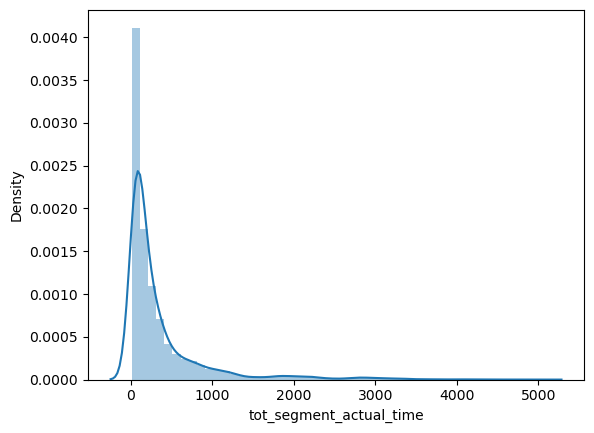

In [60]:
sns.distplot(delhi_final['tot_segment_actual_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3112200793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['actual_distance_to_destination'])


<Axes: xlabel='actual_distance_to_destination', ylabel='Density'>

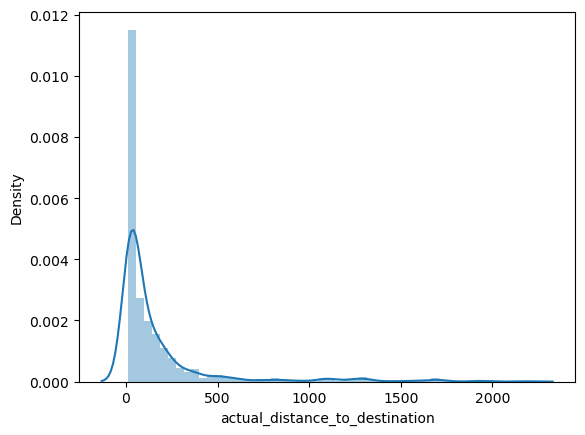

In [61]:
sns.distplot(delhi_final['actual_distance_to_destination'])

We have many outliers we can remove them using the IQR method

In [62]:
delhi_final.columns

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'tot_segment_actual_time', 'tot_segment_osrm_time',
       'tot_segment_osrm_distance', 'od_year', 'od_month', 'od_date',
       'od_hour', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'od_duration'],
      dtype='object')

<Axes: xlabel='actual_time', ylabel='actual_distance_to_destination'>

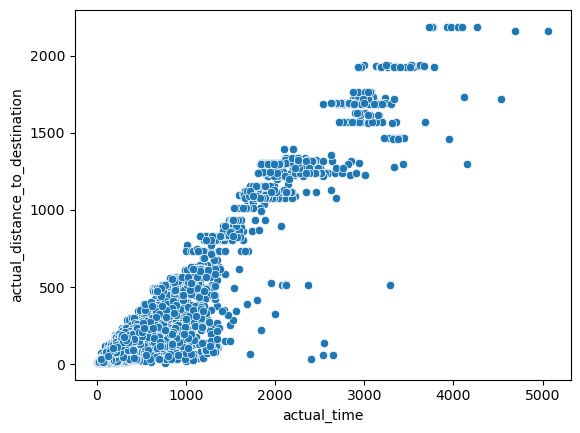

In [63]:
sns.scatterplot(x=delhi_final['actual_time'],y=delhi_final['actual_distance_to_destination'])

<Axes: xlabel='tot_segment_actual_time', ylabel='tot_segment_osrm_distance'>

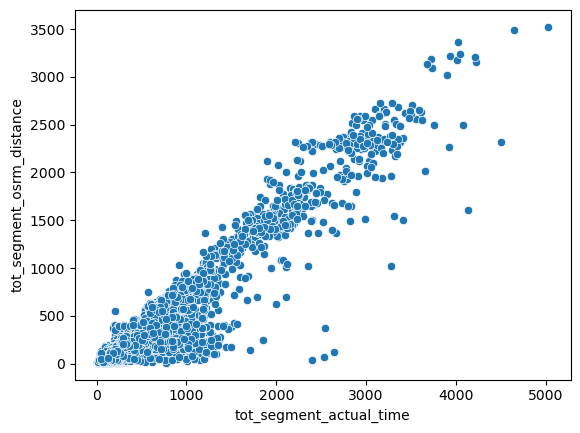

In [64]:
sns.scatterplot(x = delhi_final['tot_segment_actual_time'], y = delhi_final['tot_segment_osrm_distance'])

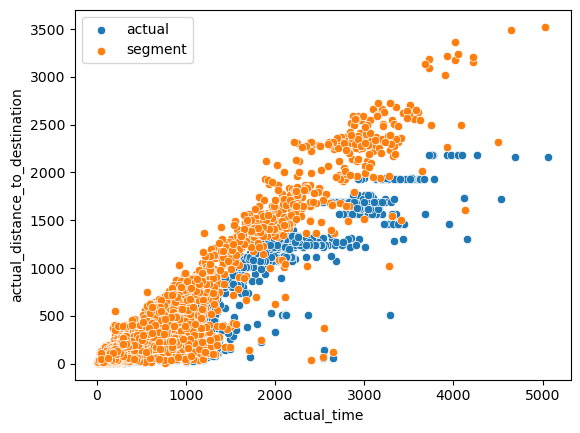

In [65]:
sns.scatterplot(x=delhi_final['actual_time'],y=delhi_final['actual_distance_to_destination'])
sns.scatterplot(x = delhi_final['tot_segment_actual_time'], y = delhi_final['tot_segment_osrm_distance'])
plt.legend(['actual','segment'])

Segment time and distance is higher compared to actual time and distance when the distance is more

<Axes: xlabel='osrm_time', ylabel='osrm_distance'>

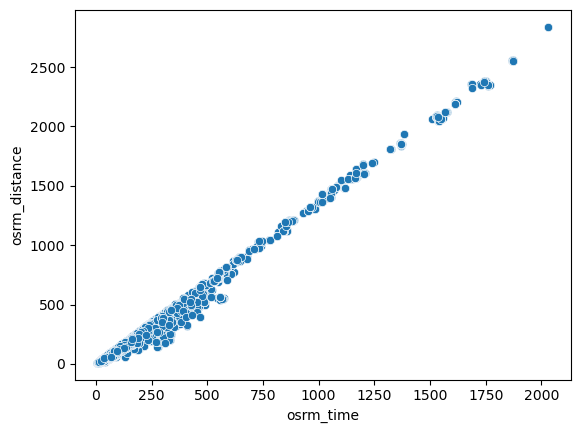

In [66]:
sns.scatterplot(x=delhi_final['osrm_time'],y=delhi_final['osrm_distance'])

<Axes: xlabel='tot_segment_osrm_time', ylabel='tot_segment_osrm_distance'>

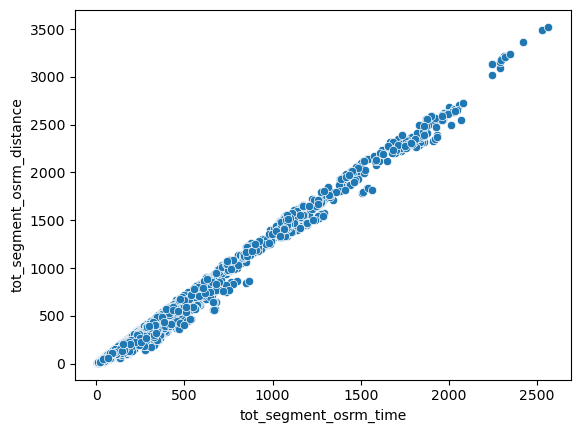

In [67]:
sns.scatterplot(x=delhi_final['tot_segment_osrm_time'],y=delhi_final['tot_segment_osrm_distance'])

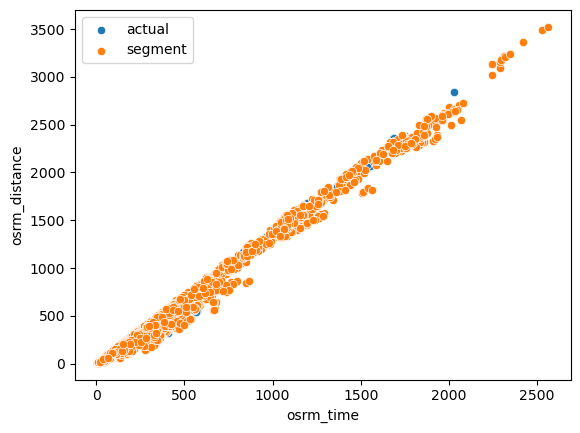

In [68]:
sns.scatterplot(x=delhi_final['osrm_time'],y=delhi_final['osrm_distance'])
sns.scatterplot(x=delhi_final['tot_segment_osrm_time'],y=delhi_final['tot_segment_osrm_distance'])
plt.legend(['actual','segment'])

In [69]:
delhi_final.groupby([delhi_final['destination_name'],delhi_final['source_name']]).agg(count = ('destination_center','count'),
dist = ('od_duration','median')).reset_index().sort_values(by = 'count',ascending=False).head()

,destination_name,source_name,count,dist
390,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),138,934.154999
218,Bengaluru_KGAirprt_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),100,181.276543
1307,Muzaffrpur_Bbganj_I (Bihar),Muzaffrpur_Bbganj_I (Bihar),88,1073.862303
219,Bengaluru_KGAirprt_HB (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),81,208.515774
1647,Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),76,1318.409778


Chandigarh_Mehmdpur_H (Punjab) to Chandigarh_Mehmdpur_H (Punjab) and from Bengaluru_KGAirprt_HB (Karnataka) to Bangalore_Nelmngla_H (Karnataka)	has more number of orders and large delivery time

In [70]:
delhi_final.groupby([delhi_final['source_state'],
delhi_final['destination_state']]).agg(Avg_time = ('od_duration','median')).reset_index().sort_values(by='Avg_time').head(10)

,source_state,destination_state,Avg_time
136,Uttar Pradesh,Rajasthan,67.255231
19,Dadra and Nagar Haveli,Gujarat,69.595762
31,Gujarat,Dadra and Nagar Haveli,72.974409
90,Maharashtra,Madhya Pradesh,100.735564
101,Pondicherry,Tamil Nadu,155.109176
20,Delhi,Delhi,161.146246
112,Rajasthan,Madhya Pradesh,175.318115
17,Chandigarh,Punjab,181.086133
67,Karnataka,Karnataka,187.084762
22,Delhi,Haryana,192.198034


Uttar Pradesh to Rajasthan and Dadra and Nagar Haveli to Gujarat are the fastest delivery trips

In [71]:
x = delhi_final.groupby([delhi_final['source_name']]).agg(count = ('source_state','count')).reset_index()
y = delhi_final.groupby([delhi_final['destination_name']]).agg(count = ('destination_state','count')).reset_index()
x=pd.merge(x,y,how='inner',left_on='source_name',right_on='destination_name')
x['count'] = x['count_x']+x['count_y']
x.drop(columns=['destination_name','count_x','count_y'],inplace=True)
x.sort_values(by='count',ascending=False).head()

,source_name,count
153,Gurgaon_Bilaspur_HB (Haryana),1294
33,Bangalore_Nelmngla_H (Karnataka),1032
55,Bhiwandi_Mankoli_HB (Maharashtra),954
74,Chandigarh_Mehmdpur_H (Punjab),618
180,Hyderabad_Shamshbd_H (Telangana),552


Gurgaon_Bilaspur_HB (Haryana),Bangalore_Nelmngla_H (Karnataka),Bhiwandi_Mankoli_HB (Maharashtra) are the top 3 busiest centers

In [72]:
delhi_final.groupby(delhi_final['destination_name']).agg(count= ('destination_center','count')).reset_index().sort_values(by='count',ascending=False)

,destination_name,count
316,Gurgaon_Bilaspur_HB (Haryana),608
65,Bangalore_Nelmngla_H (Karnataka),485
118,Bhiwandi_Mankoli_HB (Maharashtra),407
167,Chandigarh_Mehmdpur_H (Punjab),322
356,Hyderabad_Shamshbd_H (Telangana),304
...,...,...
195,Chinnur_AsnsdhRD_D (Telangana),1
84,Bellmpalli_BasthDPP_D (Telangana),1
571,Mumbai_Skynet_INT (Maharashtra),1
568,Mumbai_Panvel_D (Maharashtra),1


<Axes: xlabel='route_type', ylabel='actual_time'>

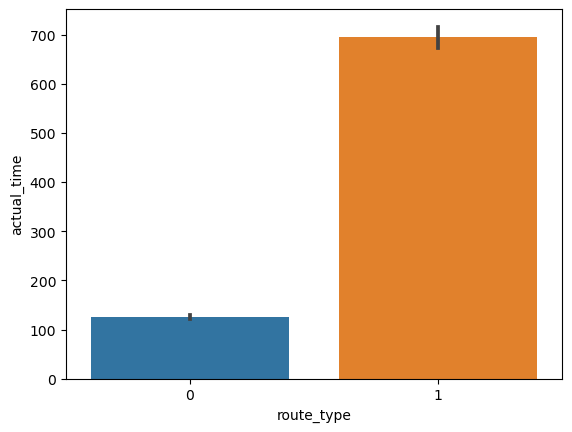

In [73]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['actual_time'])

<Axes: xlabel='route_type', ylabel='start_scan_to_end_scan'>

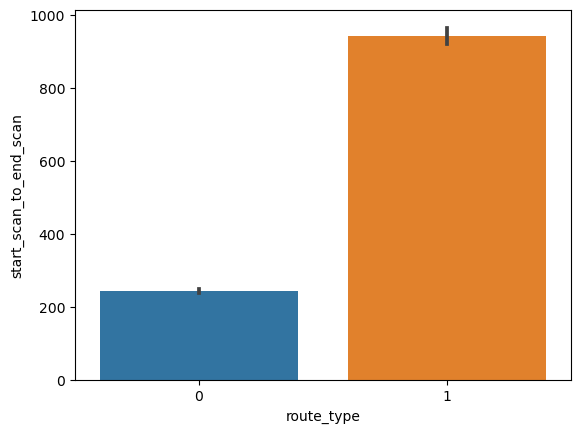

In [74]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['start_scan_to_end_scan'])

<Axes: xlabel='route_type', ylabel='actual_distance_to_destination'>

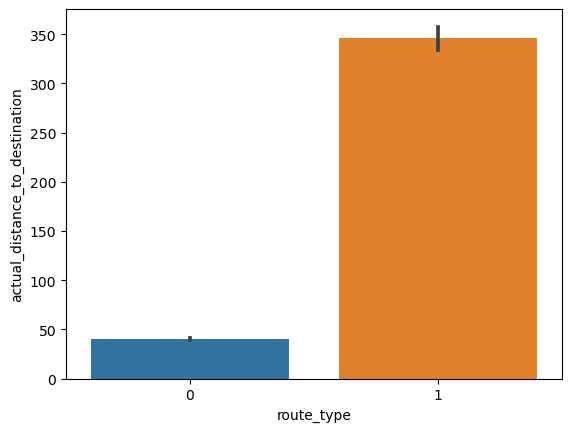

In [75]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['actual_distance_to_destination'])

<Axes: xlabel='route_type', ylabel='osrm_time'>

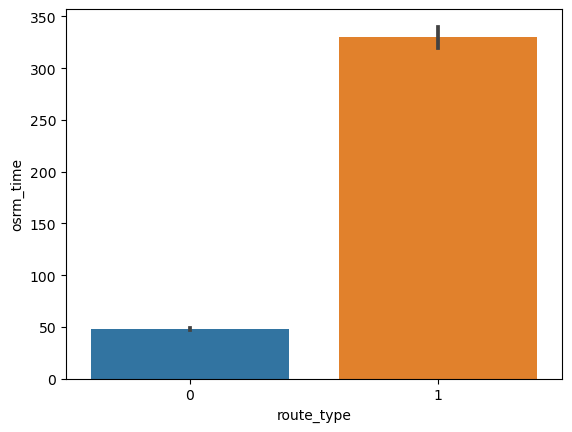

In [76]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['osrm_time'])

<Axes: xlabel='route_type', ylabel='osrm_distance'>

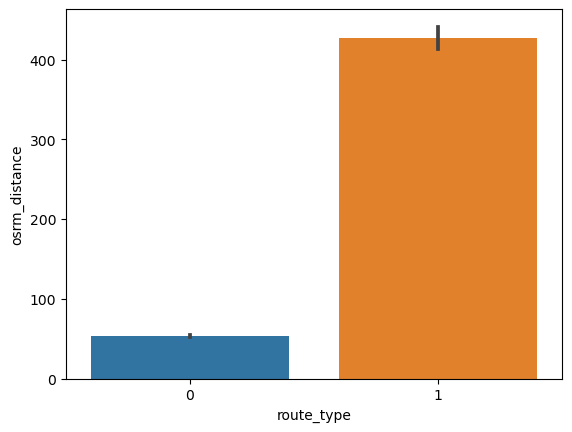

In [77]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['osrm_distance'])

<Axes: xlabel='route_type', ylabel='tot_segment_actual_time'>

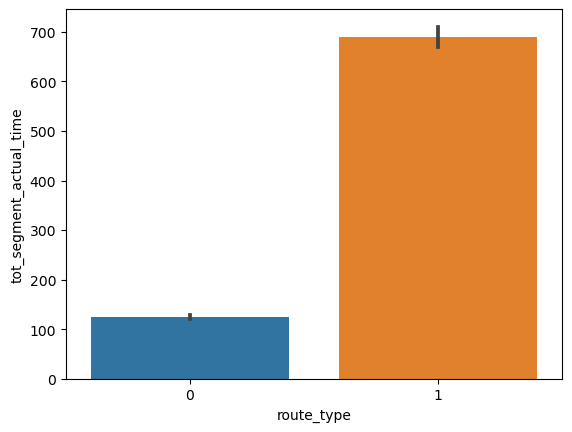

In [78]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['tot_segment_actual_time'])

<Axes: xlabel='route_type', ylabel='tot_segment_osrm_time'>

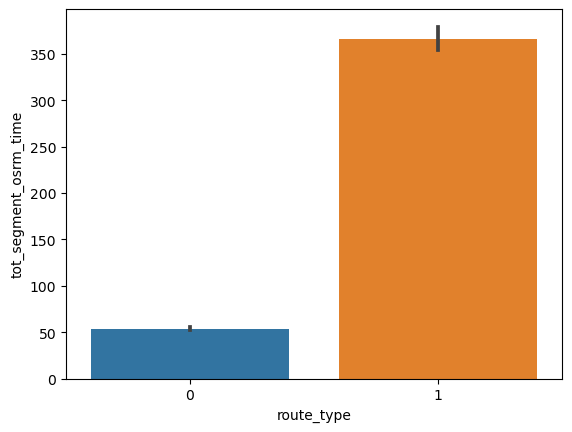

In [79]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['tot_segment_osrm_time'])

<Axes: xlabel='route_type', ylabel='tot_segment_osrm_distance'>

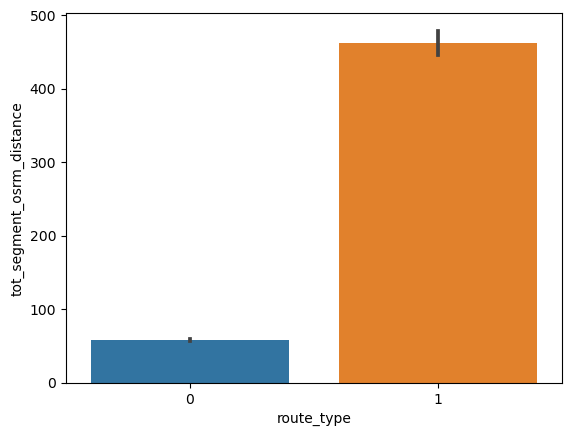

In [80]:
sns.barplot(x=delhi_final['route_type'],y=delhi_final['tot_segment_osrm_distance'])

<Axes: >

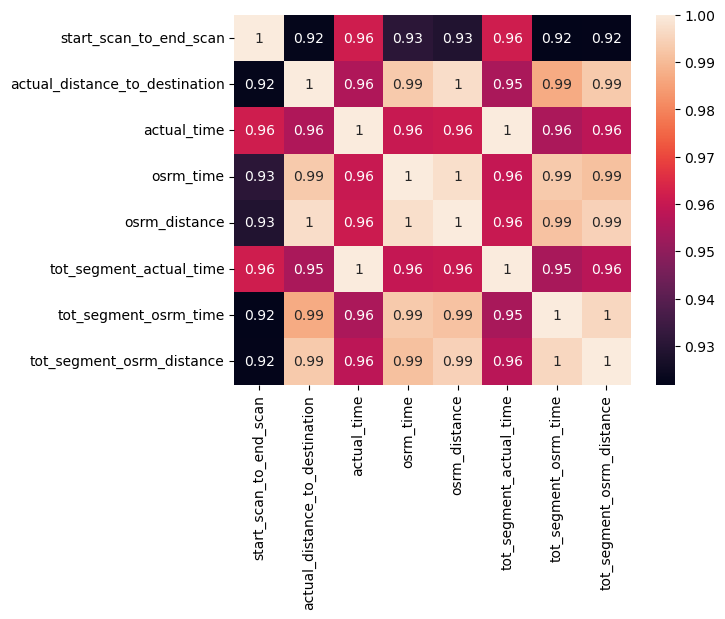

In [81]:
sns.heatmap(delhi_final[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance',
                     'tot_segment_actual_time', 'tot_segment_osrm_time','tot_segment_osrm_distance']].corr(),annot=True)

From above heatmap we can infer that if distance increases then the time taken is also increases

### Outliers

In [82]:
delhi_final_copy = delhi_final.copy()

<Axes: xlabel='actual_distance_to_destination'>

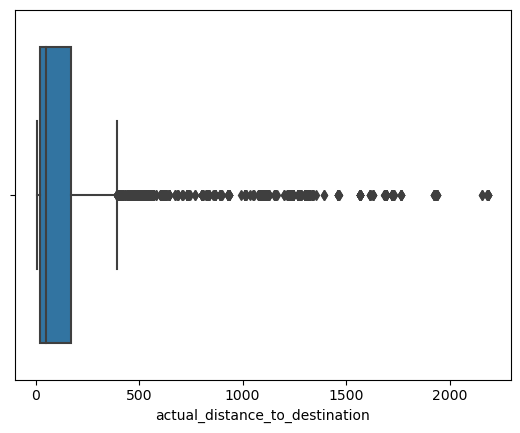

In [83]:
sns.boxplot(x=delhi_final['actual_distance_to_destination'])

<Axes: xlabel='actual_distance_to_destination'>

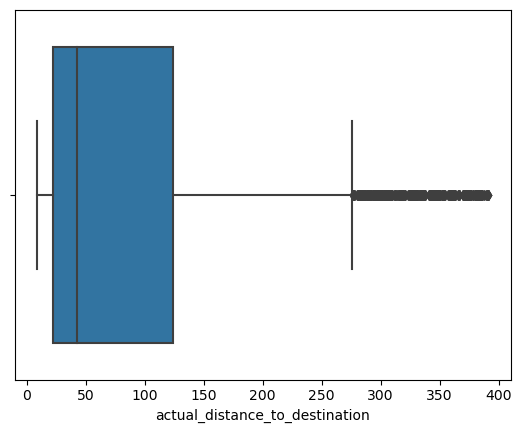

In [84]:
## Finding Quartiles

q1=delhi_final['actual_distance_to_destination'].quantile(0.25)
q3=delhi_final['actual_distance_to_destination'].quantile(0.75)
iqr=q3-q1

## Removing the outliers

delhi_final = delhi_final[(delhi_final['actual_distance_to_destination'] >q1 - 1.5*iqr) & 
                          (delhi_final['actual_distance_to_destination'] <q3 + 1.5*iqr)]

## Plotting
sns.boxplot(x=delhi_final['actual_distance_to_destination'])

<Axes: xlabel='actual_time'>

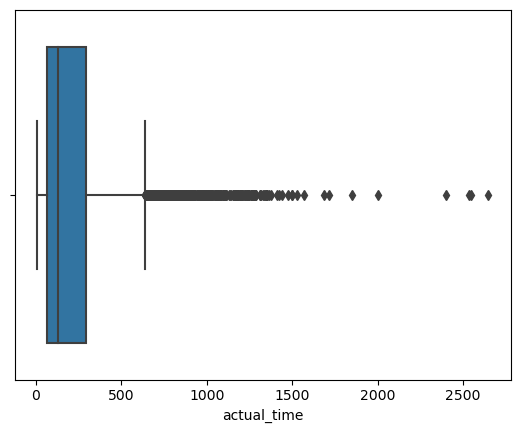

In [85]:
sns.boxplot(x=delhi_final['actual_time'])

<Axes: xlabel='actual_time'>

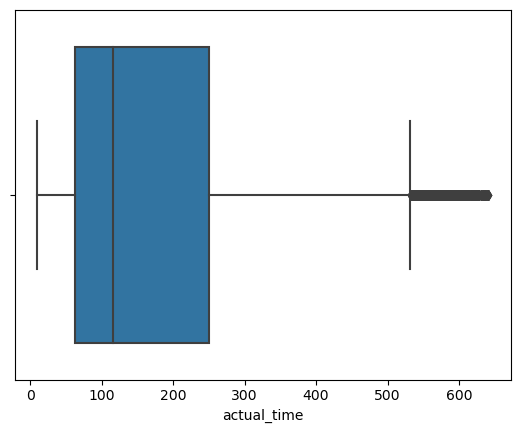

In [86]:
## Finding Quartiles
q1=delhi_final['actual_time'].quantile(0.25)
q3=delhi_final['actual_time'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final =delhi_final[(delhi_final['actual_time'] > q1 -1.5* iqr) & (delhi_final['actual_time'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['actual_time'])

<Axes: xlabel='osrm_time'>

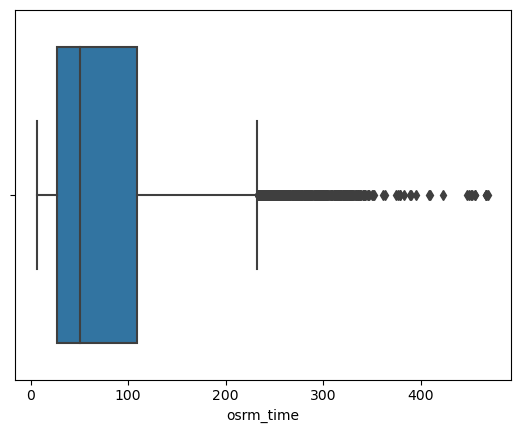

In [87]:
sns.boxplot(x=delhi_final['osrm_time'])

<Axes: xlabel='osrm_time'>

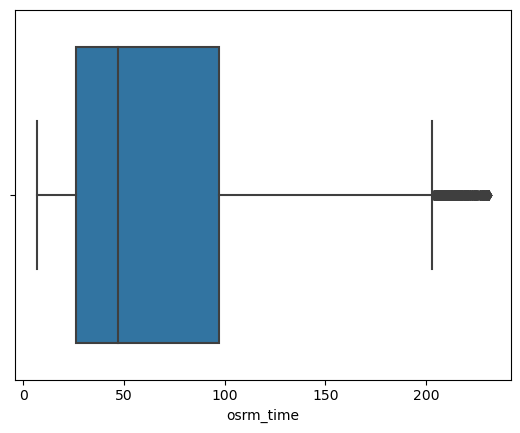

In [88]:
## Finding Quartiles
q1=delhi_final['osrm_time'].quantile(0.25)
q3=delhi_final['osrm_time'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final =delhi_final[(delhi_final['osrm_time'] > q1 -1.5* iqr) & (delhi_final['osrm_time'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['osrm_time'])

<Axes: xlabel='osrm_distance'>

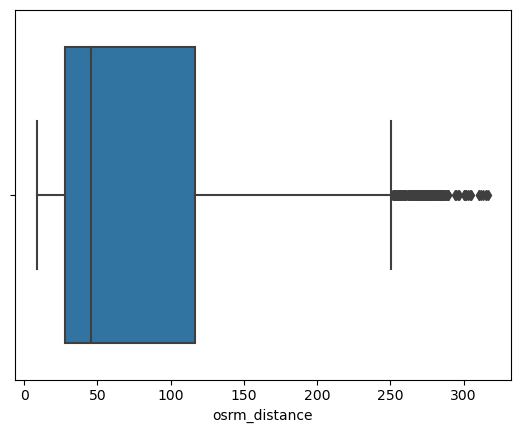

In [89]:
sns.boxplot(x=delhi_final['osrm_distance'])

<Axes: xlabel='osrm_distance'>

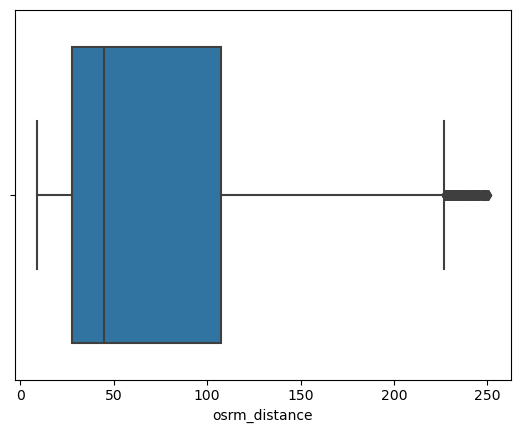

In [90]:
## Finding Quartiles
q1=delhi_final['osrm_distance'].quantile(0.25)
q3=delhi_final['osrm_distance'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final = delhi_final[(delhi_final['osrm_distance'] > q1 -1.5* iqr) & (delhi_final['osrm_distance'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['osrm_distance'])

<Axes: xlabel='tot_segment_actual_time'>

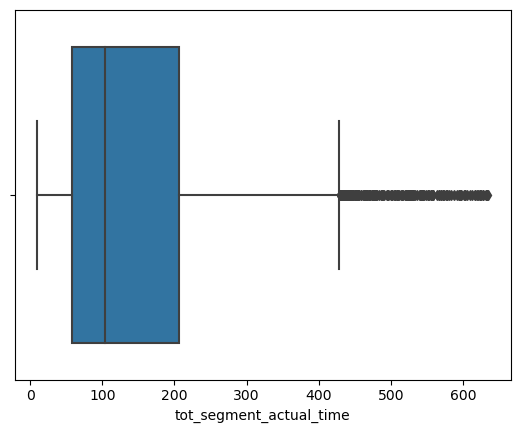

In [91]:
sns.boxplot(x=delhi_final['tot_segment_actual_time'])

<Axes: xlabel='tot_segment_actual_time'>

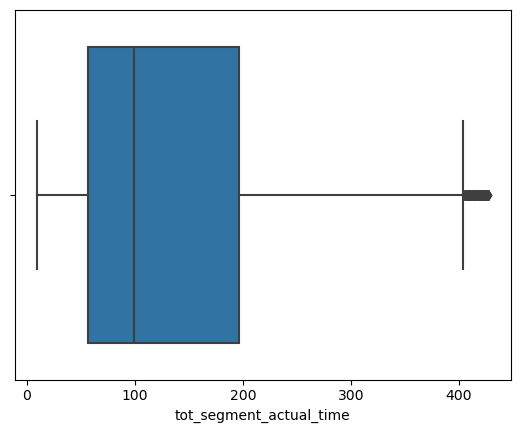

In [92]:
## Finding Quartiles
q1=delhi_final['tot_segment_actual_time'].quantile(0.25)
q3=delhi_final['tot_segment_actual_time'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final = delhi_final[(delhi_final['tot_segment_actual_time'] > q1 -1.5* iqr) & (delhi_final['tot_segment_actual_time'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['tot_segment_actual_time'])

<Axes: xlabel='tot_segment_osrm_time'>

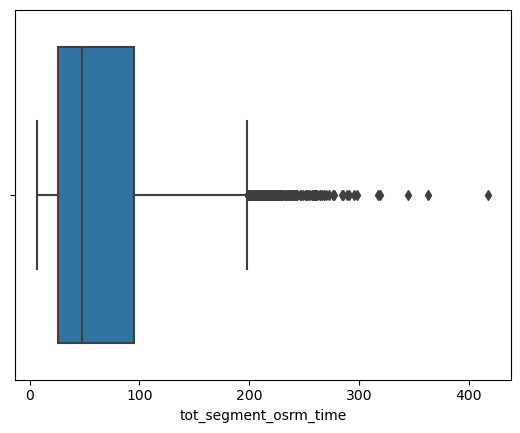

In [93]:
sns.boxplot(x=delhi_final['tot_segment_osrm_time'])

<Axes: xlabel='tot_segment_osrm_time'>

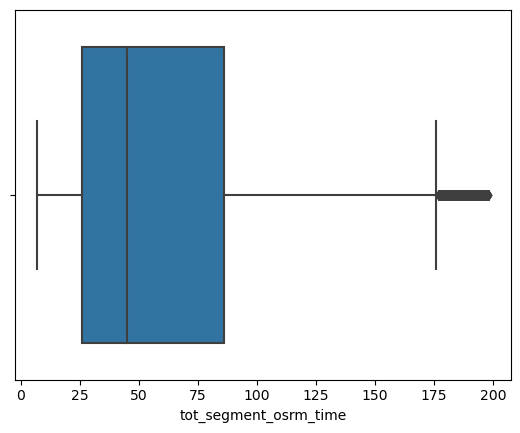

In [94]:
## Finding Quartiles
q1=delhi_final['tot_segment_osrm_time'].quantile(0.25)
q3=delhi_final['tot_segment_osrm_time'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final = delhi_final[(delhi_final['tot_segment_osrm_time'] > q1 -1.5* iqr) & (delhi_final['tot_segment_osrm_time'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['tot_segment_osrm_time'])

<Axes: xlabel='tot_segment_osrm_distance'>

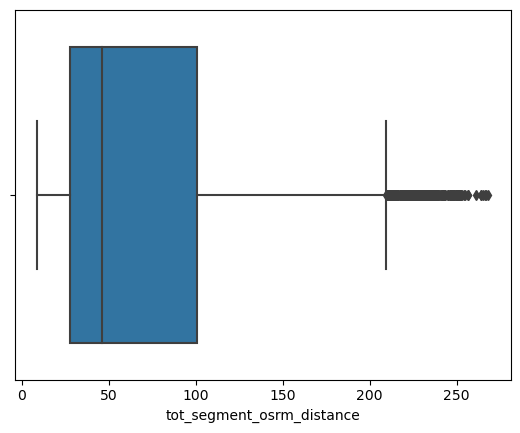

In [95]:
sns.boxplot(x=delhi_final['tot_segment_osrm_distance'])

<Axes: xlabel='tot_segment_osrm_distance'>

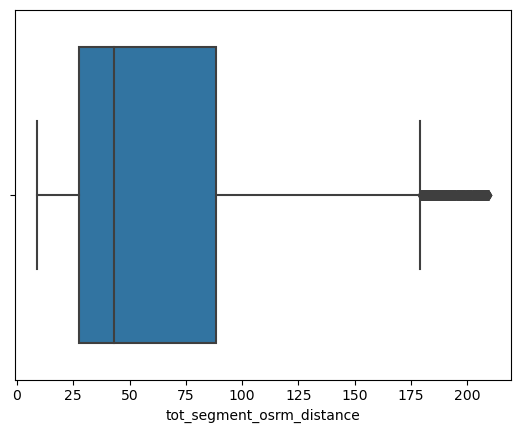

In [96]:
## Finding Quartiles
q1=delhi_final['tot_segment_osrm_distance'].quantile(0.25)
q3=delhi_final['tot_segment_osrm_distance'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final =delhi_final[(delhi_final['tot_segment_osrm_distance'] > q1 -1.5* iqr) & (delhi_final['tot_segment_osrm_distance'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['tot_segment_osrm_distance'])

<Axes: xlabel='od_duration'>

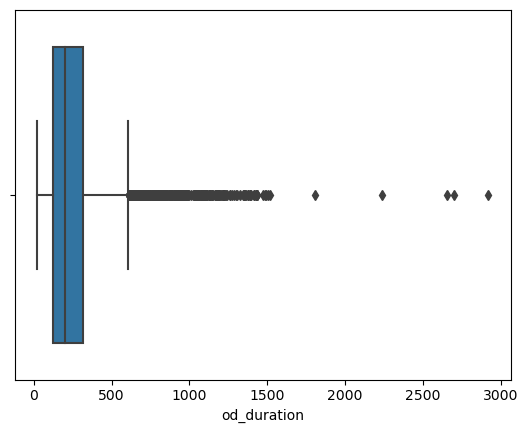

In [97]:
sns.boxplot(x=delhi_final['od_duration'])

<Axes: xlabel='tot_segment_osrm_distance'>

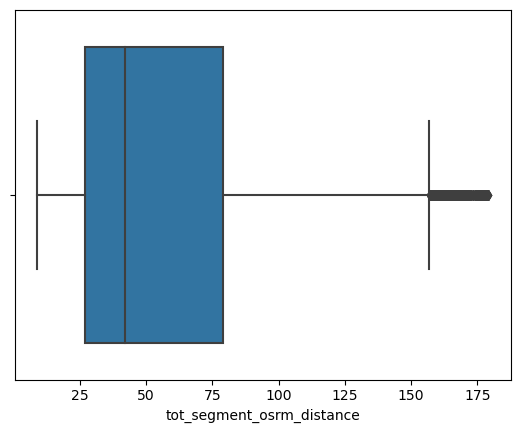

In [98]:
## Finding Quartiles
q1=delhi_final['tot_segment_osrm_distance'].quantile(0.25)
q3=delhi_final['tot_segment_osrm_distance'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final = delhi_final[(delhi_final['tot_segment_osrm_distance'] > q1 -1.5* iqr) & (delhi_final['tot_segment_osrm_distance'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['tot_segment_osrm_distance'])

<Axes: xlabel='start_scan_to_end_scan'>

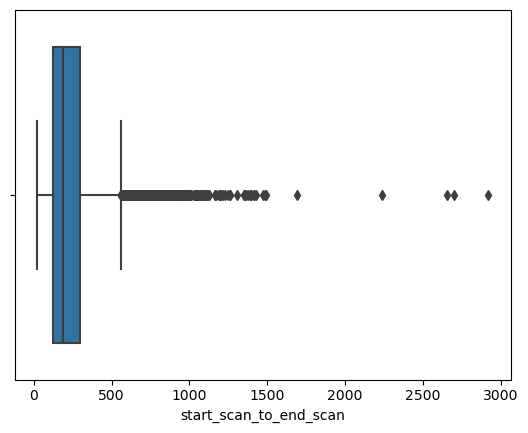

In [99]:
sns.boxplot(x=delhi_final['start_scan_to_end_scan'])

<Axes: xlabel='start_scan_to_end_scan'>

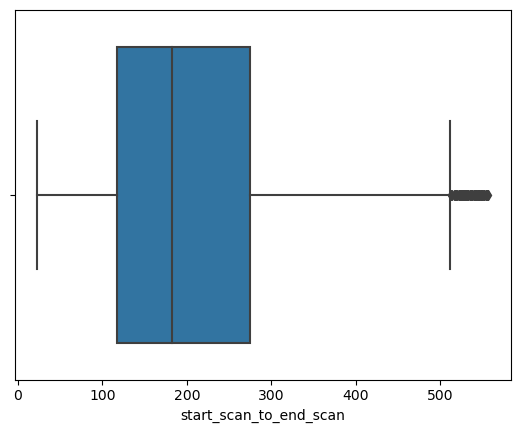

In [100]:
## Finding Quartiles
q1=delhi_final['start_scan_to_end_scan'].quantile(0.25)
q3=delhi_final['start_scan_to_end_scan'].quantile(0.75)
iqr=q3-q1

## Removing the outliers
delhi_final = delhi_final[(delhi_final['start_scan_to_end_scan'] > q1 -1.5* iqr) & (delhi_final['start_scan_to_end_scan'] < q3 +1.5* iqr)]

## Plotting
sns.boxplot(x=delhi_final['start_scan_to_end_scan'])

<Axes: xlabel='route_type', ylabel='od_duration'>

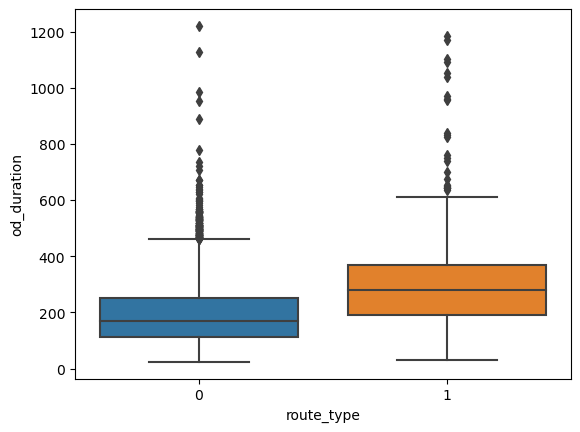

In [101]:
sns.boxplot(y=delhi_final['od_duration'],x=delhi_final['route_type'])

<Axes: xlabel='route_type', ylabel='od_duration'>

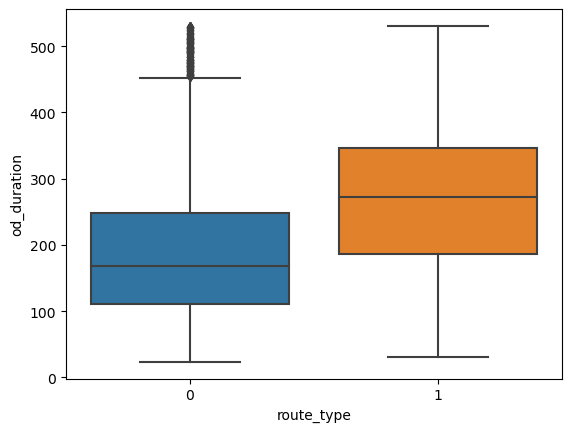

In [102]:
q1=delhi_final['od_duration'].quantile(0.25)
q3=delhi_final['od_duration'].quantile(0.75)
iqr=q3-q1

delhi_final = delhi_final[(delhi_final['od_duration'] > q1 -1.5* iqr) & (delhi_final['od_duration'] < q3 +1.5* iqr)]

sns.boxplot(y=delhi_final['od_duration'],x=delhi_final_copy['route_type'])

In [103]:
delhi_final.shape

(6737, 27)

## Hypothesis Testing

#### Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [104]:
stat.ks_2samp(delhi_final['start_scan_to_end_scan'],delhi_final['od_duration'])

KstestResult(statistic=0.019147988719014398, pvalue=0.16905771224625468, statistic_location=315.0, statistic_sign=1)

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2510253170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=delhi_final['actual_time'])


<Axes: ylabel='Density'>

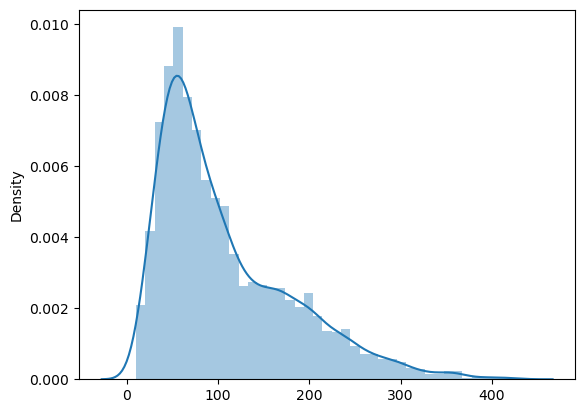

In [105]:
sns.distplot(x=delhi_final['actual_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3667721201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['actual_time']))


<Axes: xlabel='actual_time', ylabel='Density'>

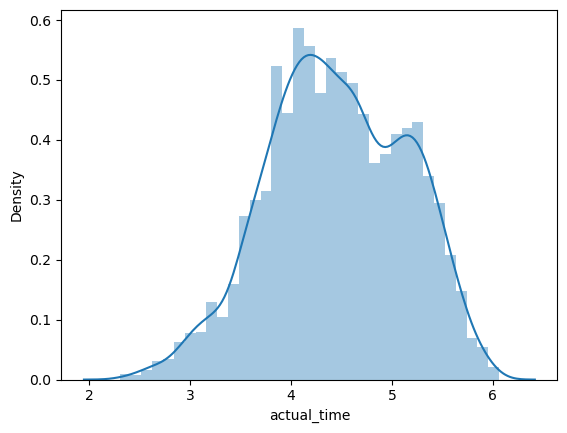

In [106]:
sns.distplot(np.log(delhi_final['actual_time']))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1656305921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((delhi_final['osrm_time']))


<Axes: xlabel='osrm_time', ylabel='Density'>

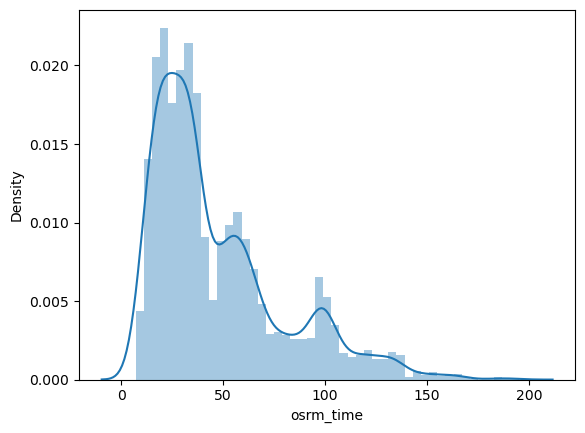

In [107]:
sns.distplot((delhi_final['osrm_time']))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1656305921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((delhi_final['osrm_time']))


<Axes: xlabel='osrm_time', ylabel='Density'>

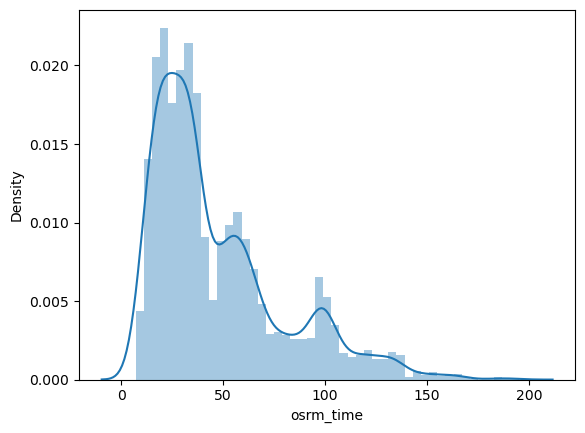

In [108]:
sns.distplot((delhi_final['osrm_time']))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\872402720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['osrm_time']))


<Axes: xlabel='osrm_time', ylabel='Density'>

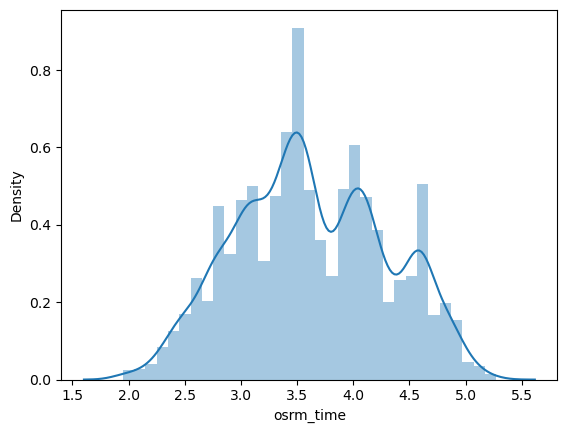

In [109]:
sns.distplot(np.log(delhi_final['osrm_time']))

In [110]:
stat.shapiro(np.log(delhi_final['actual_time']).sample(3999))

ShapiroResult(statistic=0.991361677646637, pvalue=7.113428430820766e-15)

In [111]:
stat.shapiro(np.log(delhi_final['osrm_time']).sample(4999))

ShapiroResult(statistic=0.9871146082878113, pvalue=5.723101099541009e-21)

In [112]:
stat.levene(np.log(delhi_final['osrm_time']),np.log(delhi_final['actual_time']))

LeveneResult(statistic=6.4884424804779695, pvalue=0.010868823316476829)

In [113]:
stat.ttest_ind(np.log(delhi_final['osrm_time']).sample(30),np.log(delhi_final['actual_time']).sample(30),equal_var=False)

Ttest_indResult(statistic=-3.7149752568801087, pvalue=0.0004588026767403351)

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

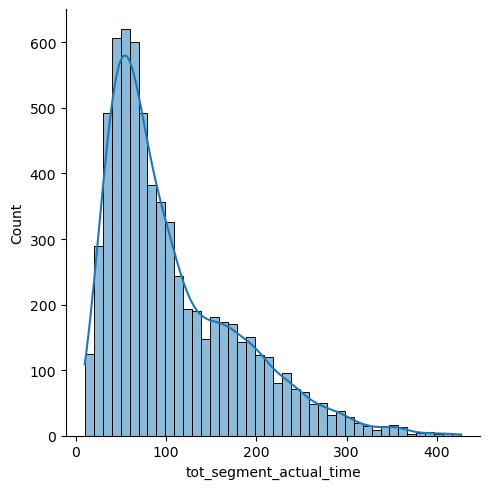

In [114]:
sns.displot(delhi_final['tot_segment_actual_time'],kde=True)

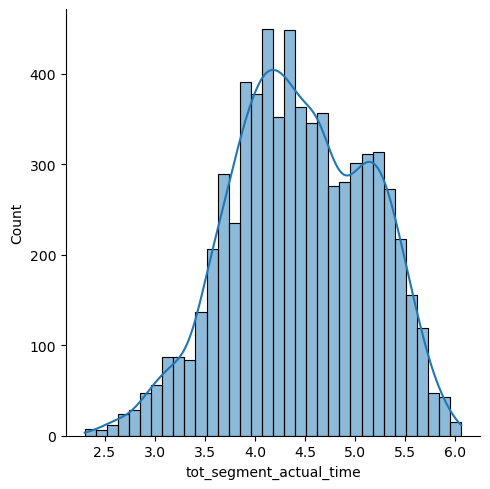

In [115]:
sns.displot(np.log(delhi_final['tot_segment_actual_time']),kde=True)

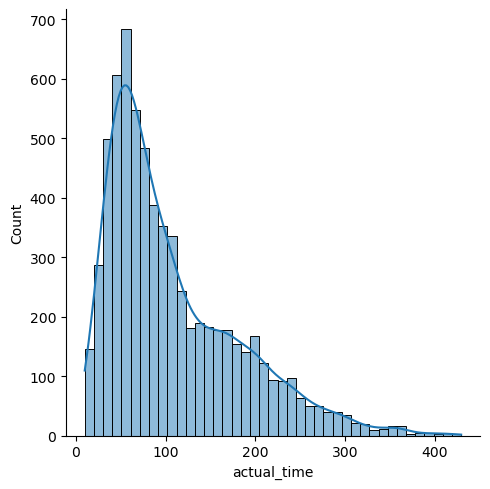

In [116]:
sns.displot(delhi_final['actual_time'],kde=True)

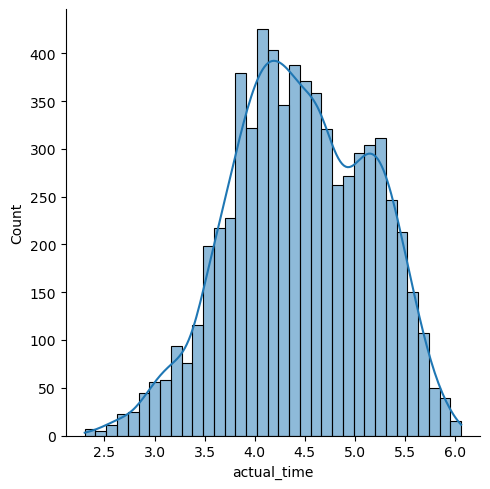

In [117]:
sns.displot(np.log(delhi_final['actual_time']),kde=True)

In [118]:
stat.shapiro(np.log(delhi_final['tot_segment_actual_time']).sample(3999))

ShapiroResult(statistic=0.9901129603385925, pvalue=4.274651824085721e-16)

In [119]:
stat.levene(np.log(delhi_final['tot_segment_actual_time']),np.log(delhi_final['actual_time']))

LeveneResult(statistic=0.026364703352395363, pvalue=0.8710152645322702)

In [120]:
stat.ttest_ind(np.log(delhi_final['tot_segment_actual_time']),np.log(delhi_final['actual_time']))

Ttest_indResult(statistic=-0.9760413172396049, pvalue=0.32906151520940685)

#### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\670856829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['osrm_distance'],kde=True)


<Axes: xlabel='osrm_distance', ylabel='Density'>

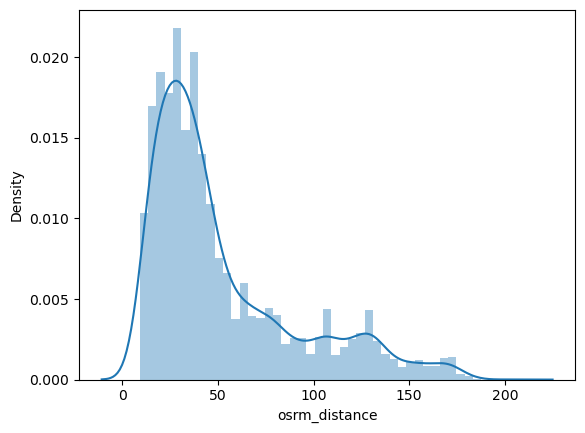

In [121]:
sns.distplot(delhi_final['osrm_distance'],kde=True)

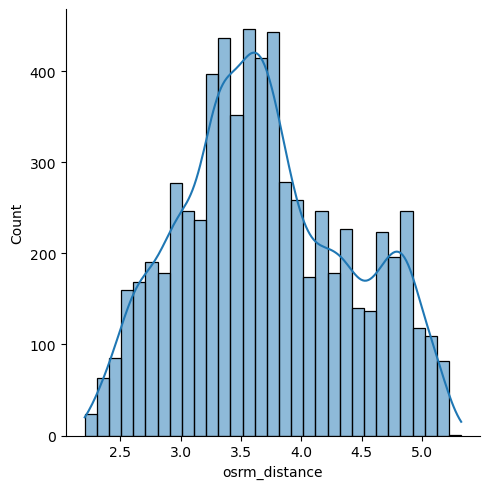

In [122]:
sns.displot(np.log(delhi_final['osrm_distance']),kde=True)

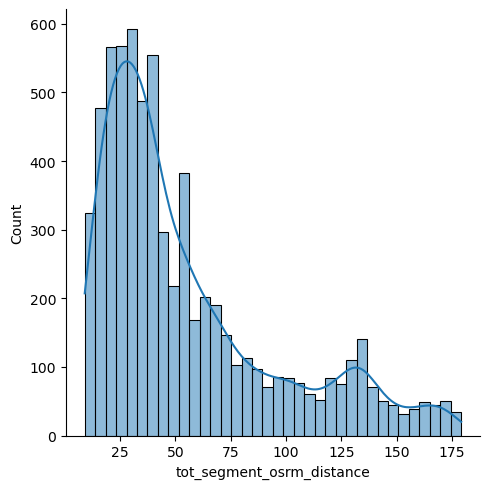

In [123]:
sns.displot(delhi_final['tot_segment_osrm_distance'],kde=True)

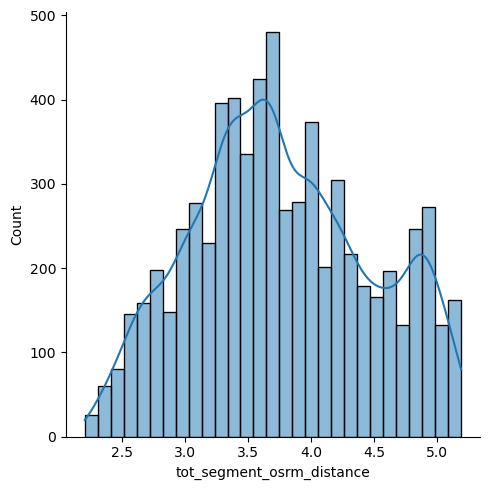

In [124]:
sns.displot(np.log(delhi_final['tot_segment_osrm_distance']),kde=True)

In [125]:
stat.shapiro(np.log(delhi_final['tot_segment_osrm_distance']).sample(3999))

ShapiroResult(statistic=0.978976309299469, pvalue=6.777022784080475e-24)

In [126]:
stat.shapiro(np.log(delhi_final['osrm_distance']).sample(3999))

ShapiroResult(statistic=0.9771597981452942, pvalue=7.465414265804925e-25)

In [127]:
stat.levene(np.log(delhi_final['osrm_distance']),np.log(delhi_final['tot_segment_osrm_distance']))

LeveneResult(statistic=4.383476947299729, pvalue=0.03630754599786417)

In [128]:
for i in range(5):
    print(stat.ttest_ind(np.log(delhi_final['osrm_distance']).sample(30),
    np.log(delhi_final['tot_segment_osrm_distance']).sample(30),equal_var=False))

Ttest_indResult(statistic=-1.2629276304394599, pvalue=0.21166977261239894)
Ttest_indResult(statistic=-0.793195818625287, pvalue=0.4311616620963754)
Ttest_indResult(statistic=-1.4324457852864627, pvalue=0.15746230523297852)
Ttest_indResult(statistic=0.6347163850778923, pvalue=0.5281435865280559)
Ttest_indResult(statistic=0.11778146421141664, pvalue=0.9066538311789993)


#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3701556252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['tot_segment_actual_time'])


<Axes: xlabel='tot_segment_actual_time', ylabel='Density'>

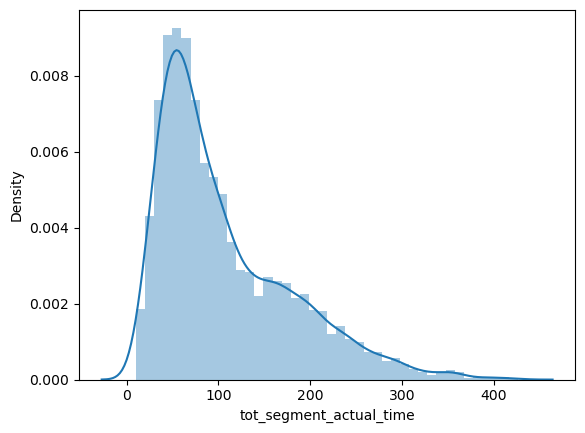

In [129]:
sns.distplot(delhi_final['tot_segment_actual_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2051165461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['tot_segment_actual_time']))


<Axes: xlabel='tot_segment_actual_time', ylabel='Density'>

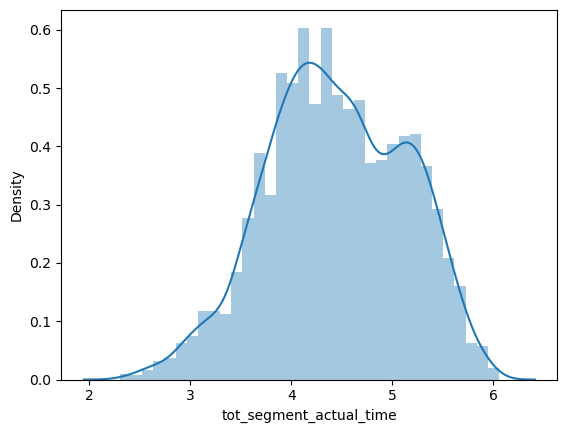

In [130]:
sns.distplot(np.log(delhi_final['tot_segment_actual_time']))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1909617456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['osrm_time'])


<Axes: xlabel='osrm_time', ylabel='Density'>

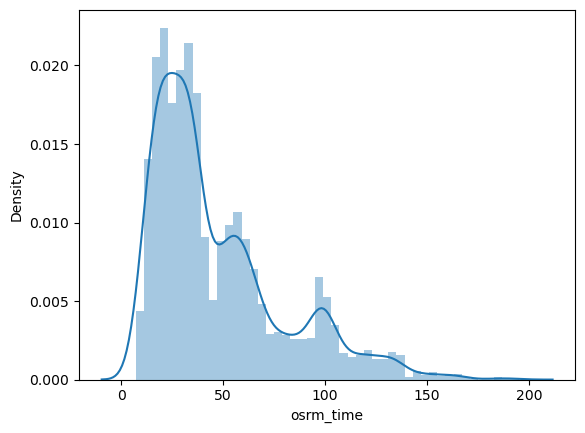

In [131]:
sns.distplot(delhi_final['osrm_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\872402720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['osrm_time']))


<Axes: xlabel='osrm_time', ylabel='Density'>

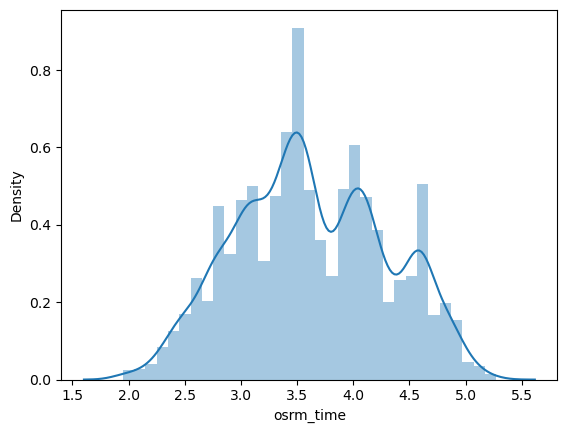

In [132]:
sns.distplot(np.log(delhi_final['osrm_time']))

In [133]:
stat.shapiro(np.log(delhi_final['tot_segment_osrm_time']).sample(4999))

ShapiroResult(statistic=0.9895013570785522, pvalue=7.87114516921585e-19)

In [134]:
stat.shapiro(np.log(delhi_final['osrm_time']).sample(4999))

ShapiroResult(statistic=0.9872833490371704, pvalue=7.924847479416897e-21)

In [135]:
stat.levene(np.log(delhi_final['osrm_time']),np.log(delhi_final['tot_segment_actual_time']))

LeveneResult(statistic=7.34544285293796, pvalue=0.006731807922507235)

In [136]:
stat.ttest_ind(np.log(delhi_final['osrm_time']).sample(50),
              np.log(delhi_final['tot_segment_osrm_time']).sample(50),equal_var=False)

Ttest_indResult(statistic=-0.5619388188641223, pvalue=0.5754438318720112)

#### Do hypothesis testing/ visual analysis between osrm time aggregated value and tot_segment_actual_time

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1732891341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['tot_segment_osrm_time'])


<Axes: xlabel='tot_segment_osrm_time', ylabel='Density'>

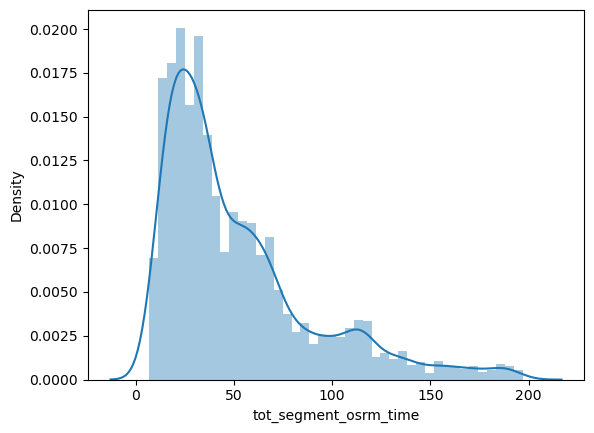

In [137]:
sns.distplot(delhi_final['tot_segment_osrm_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2947952841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['tot_segment_osrm_time']))


<Axes: xlabel='tot_segment_osrm_time', ylabel='Density'>

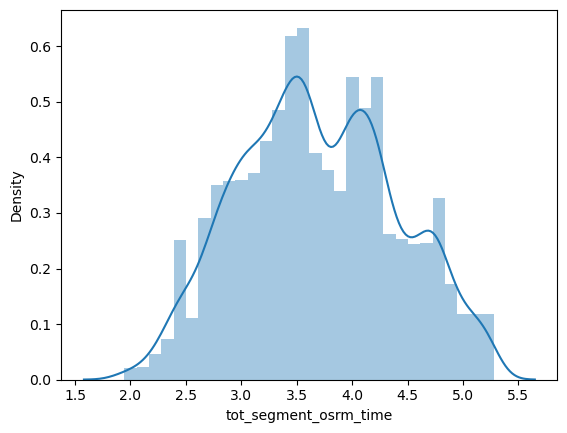

In [138]:
sns.distplot(np.log(delhi_final['tot_segment_osrm_time']))

In [139]:
stat.shapiro(np.log(delhi_final['tot_segment_osrm_time']).sample(4999))

ShapiroResult(statistic=0.9894728064537048, pvalue=7.387643625517885e-19)

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3701556252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi_final['tot_segment_actual_time'])


<Axes: xlabel='tot_segment_actual_time', ylabel='Density'>

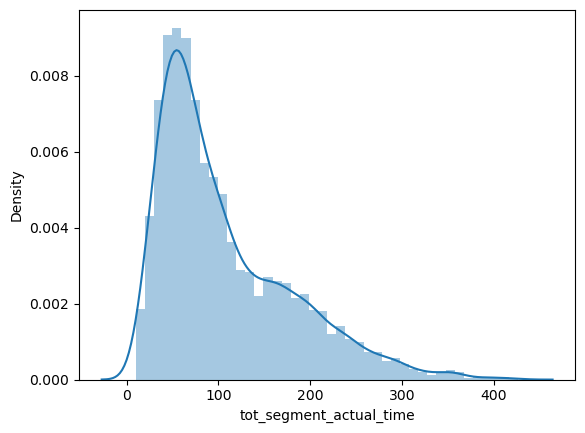

In [140]:
sns.distplot(delhi_final['tot_segment_actual_time'])

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2051165461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(delhi_final['tot_segment_actual_time']))


<Axes: xlabel='tot_segment_actual_time', ylabel='Density'>

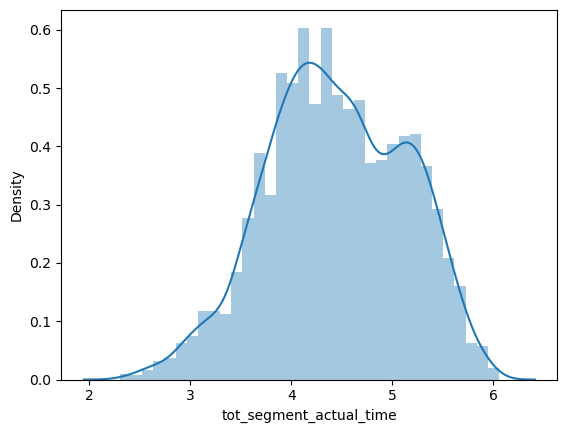

In [141]:
sns.distplot(np.log(delhi_final['tot_segment_actual_time']))

In [142]:
stat.shapiro(np.log(delhi_final['tot_segment_actual_time']).sample(4999))

ShapiroResult(statistic=0.9913488626480103, pvalue=6.348686640216352e-17)

In [143]:
stat.levene(np.log(delhi_final['tot_segment_actual_time']),np.log(delhi_final['tot_segment_osrm_time']))

LeveneResult(statistic=7.413564939946172, pvalue=0.006481724395964469)

In [144]:
stat.ttest_ind(np.log(delhi_final['tot_segment_osrm_time']).sample(50),
               np.log(delhi_final['tot_segment_actual_time']).sample(50),equal_var=False)

Ttest_indResult(statistic=-4.655956314932837, pvalue=1.0233036003221253e-05)

### Normalize/ Standardize

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1463112275.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["actual_time"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1463112275.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(std_sca

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

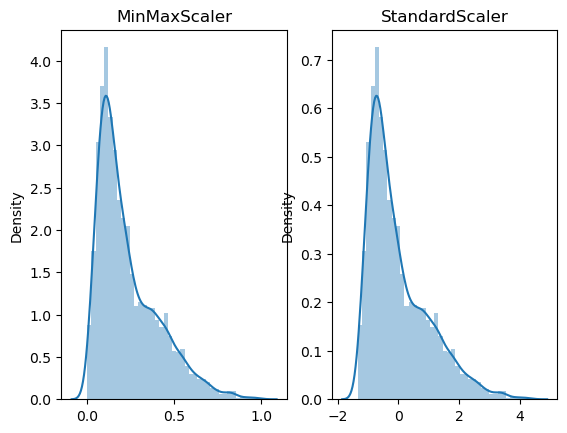

In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
MinMaxScaler = MinMaxScaler()
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["actual_time"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["actual_time"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\986260681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["start_scan_to_end_scan"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\986260681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

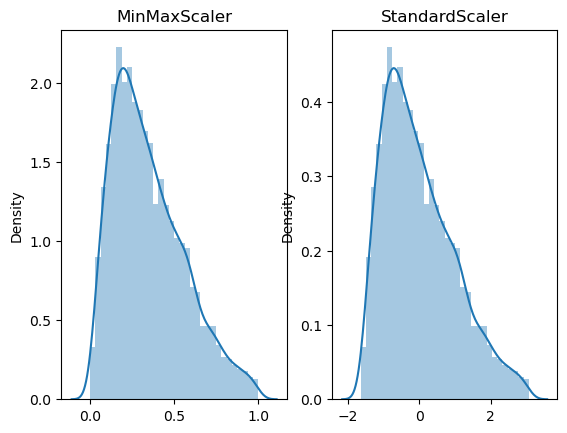

In [147]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["start_scan_to_end_scan"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["start_scan_to_end_scan"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2034201706.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["actual_distance_to_destination"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2034201706.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

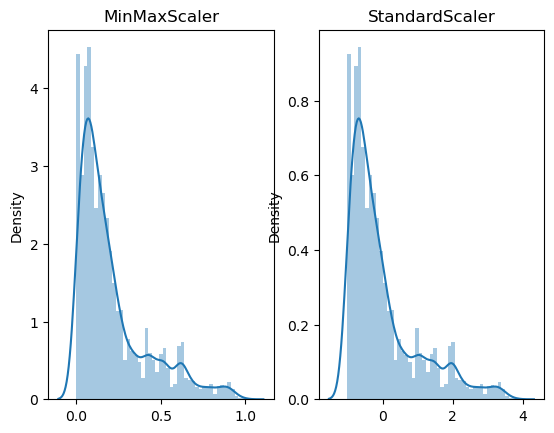

In [148]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["actual_distance_to_destination"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["actual_distance_to_destination"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2864345573.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["osrm_time"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2864345573.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(std_scale.

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

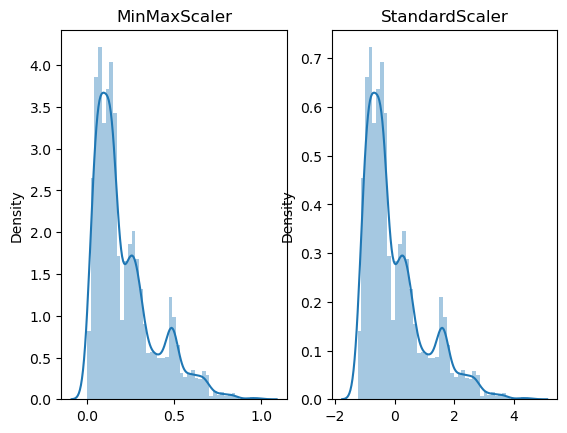

In [149]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["osrm_time"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["osrm_time"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1846360903.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["osrm_distance"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\1846360903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(std_sc

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

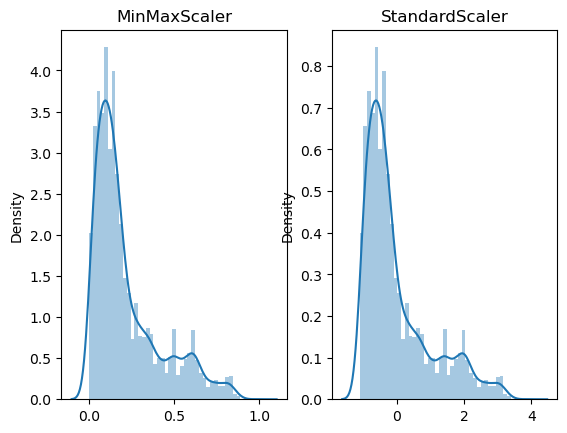

In [152]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["osrm_distance"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["osrm_distance"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3151521933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["tot_segment_osrm_time"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\3151521933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

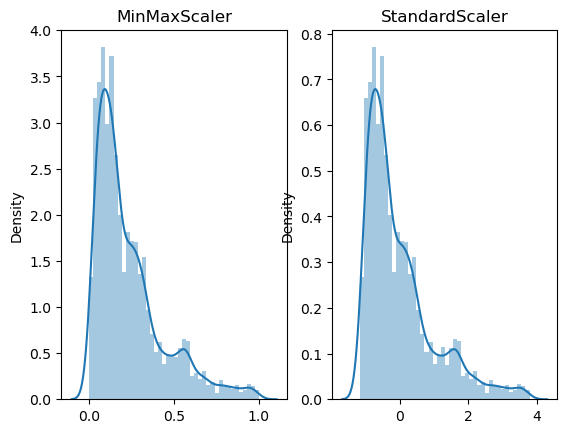

In [153]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["tot_segment_osrm_time"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["tot_segment_osrm_time"]]))

C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2343051275.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler.fit_transform(delhi_final[["tot_segment_osrm_distance"]]))
C:\Users\5040876\AppData\Local\Temp\ipykernel_33052\2343051275.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

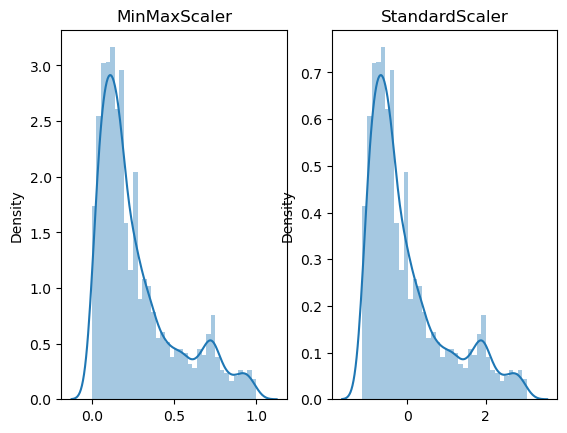

In [154]:
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(delhi_final[["tot_segment_osrm_distance"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(delhi_final[["tot_segment_osrm_distance"]]))

## Insights